<a href="https://colab.research.google.com/github/mir-sam-ali/CS5223-Deep-Learning-Project/blob/main/FashionMNIST_DL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DL Project

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import random

In [2]:
from torch.utils.data import DataLoader
import torch.nn as nn 
from torch import optim

In [3]:
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

mnist_dataset_train  = datasets.FashionMNIST(root='data', train=True, transform=ToTensor(), download=True)
mnist_dataset_test = datasets.FashionMNIST(root='data', train=False, transform=ToTensor(), download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



## Data Preprocessing

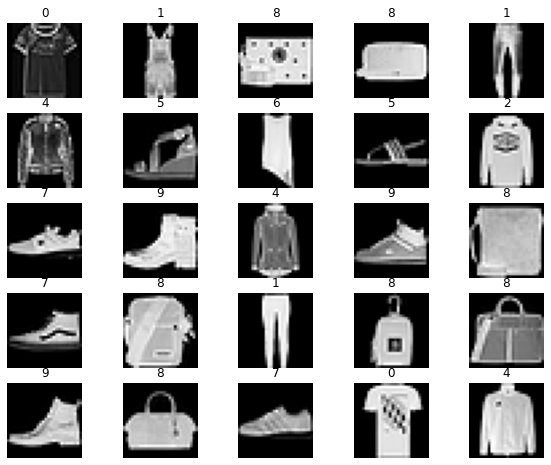

In [4]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(mnist_dataset_train), size=(1,)).item()
    img, label = mnist_dataset_train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [5]:
mnist_dataset_train

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
# custom tranformer for rotation

class Rotate(object):
    def __init__(self, angle):
        self.angle = angle

    def __call__(self, img):
        return transforms.functional.rotate(img, self.angle)

In [9]:
mnist_90_dataset_train = None 
mnist_90_dataset_test = None

# Rotate the MNIST images by 90 degrees and create a dataset
transformOpt = transforms.Compose([
  Rotate(270),
  ToTensor()
])
mnist_90_dataset_train  = datasets.FashionMNIST(root='data', train=True, transform=transformOpt, download=True)
mnist_90_dataset_test   = datasets.FashionMNIST(root='data', train=False, transform=transformOpt, download=True)

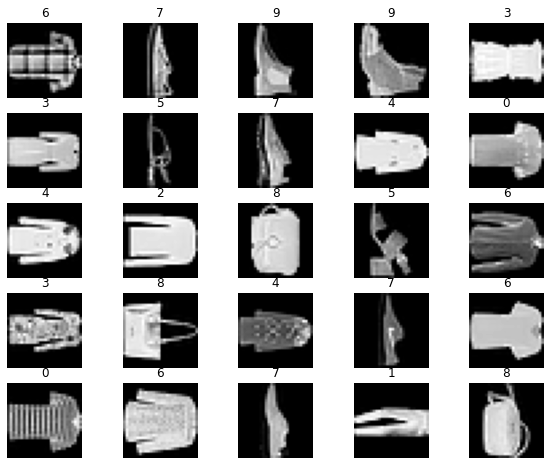

In [10]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(mnist_90_dataset_train), size=(1,)).item()
    img, label = mnist_90_dataset_train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

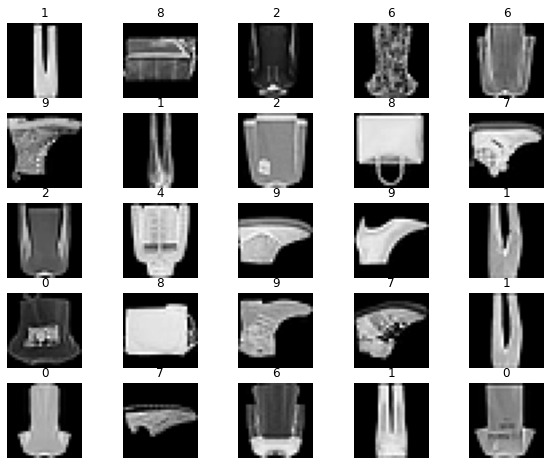

In [12]:
mnist_180_dataset_train = None 
mnist_180_dataset_test = None 

# Rotate the MNIST images by 180 degrees and create a dataset
transformOpt = transforms.Compose([
  Rotate(180),
  ToTensor()
])
mnist_180_dataset_train  = datasets.FashionMNIST(root='data', train=True, transform=transformOpt, download=True)
mnist_180_dataset_test   = datasets.FashionMNIST(root='data', train=False, transform=transformOpt, download=True)

figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(mnist_180_dataset_train), size=(1,)).item()
    img, label = mnist_180_dataset_train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

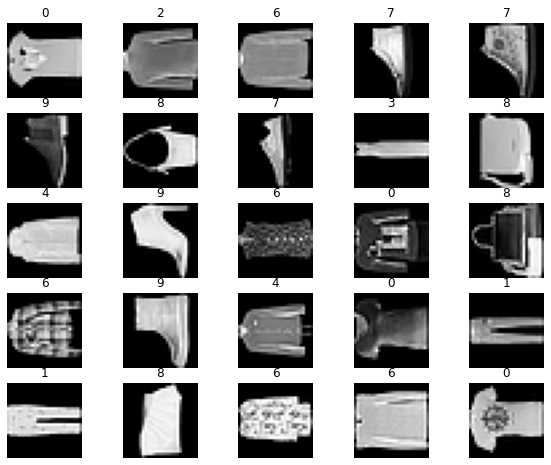

In [13]:
mnist_270_dataset_train = None 
mnist_270_dataset_test = None

# Rotate the MNIST images by 270 degrees and create a dataset
transformOpt = transforms.Compose([
  Rotate(90),
  ToTensor()
])
mnist_270_dataset_train  = datasets.FashionMNIST(root='data', train=True, transform=transformOpt, download=True)
mnist_270_dataset_test   = datasets.FashionMNIST(root='data', train=False, transform=transformOpt, download=True)

figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(mnist_270_dataset_train), size=(1,)).item()
    img, label = mnist_270_dataset_train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## MNIST Basic Classification and Testing (Model Building and Testing)

### Model Building and Testing on Normal Images

In [40]:
loaders = {
    'train' : DataLoader(mnist_dataset_train, batch_size = 100, shuffle= True, num_workers=1),
    'test'  : DataLoader(mnist_dataset_test, batch_size = 100, shuffle= True, num_workers=1)
}
loaders

{'test': <torch.utils.data.dataloader.DataLoader at 0x7f4b24d8ff50>,
 'train': <torch.utils.data.dataloader.DataLoader at 0x7f4b24d8f590>}

In [50]:
# Creating the CNN class for basic classification

class CNN_MNIST(nn.Module):
    
    def __init__(self):
        super(CNN_MNIST, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        
        return out

In [51]:
cnn_mnist = CNN_MNIST()
print(cnn_mnist)

CNN_MNIST(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


In [52]:
loss_func = nn.CrossEntropyLoss()
loss_func

CrossEntropyLoss()

In [53]:
optimizer = optim.Adam(cnn_mnist.parameters(), lr = 0.01)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    weight_decay: 0
)

In [55]:
# Training

from torch.autograd import Variable

num_epochs = 5

def train(num_epochs, cnn, loaders):
    cnn.train()

    total_steps = len(loaders['train'])

    for epoch in range(num_epochs):
        for i,(images, labels) in enumerate(loaders['train']):
            batch_x = Variable(images.view(100, 1, 28, 28))
            batch_y = Variable(labels)

            output = cnn(batch_x)
            loss = loss_func(output, batch_y)

            optimizer.zero_grad()

            loss.backward()

            optimizer.step()
            if (i+1)%100 == 0:
                print('Epoch [{}/{}], Step[{},{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_steps, loss.item() ))

train(num_epochs, cnn_mnist, loaders)

Epoch [1/5], Step[100,600], Loss: 0.4232
Epoch [1/5], Step[200,600], Loss: 0.4843
Epoch [1/5], Step[300,600], Loss: 0.5107
Epoch [1/5], Step[400,600], Loss: 0.5254
Epoch [1/5], Step[500,600], Loss: 0.6165
Epoch [1/5], Step[600,600], Loss: 0.3668
Epoch [2/5], Step[100,600], Loss: 0.3858
Epoch [2/5], Step[200,600], Loss: 0.3682
Epoch [2/5], Step[300,600], Loss: 0.4122
Epoch [2/5], Step[400,600], Loss: 0.5713
Epoch [2/5], Step[500,600], Loss: 0.3780
Epoch [2/5], Step[600,600], Loss: 0.3659
Epoch [3/5], Step[100,600], Loss: 0.1834
Epoch [3/5], Step[200,600], Loss: 0.3141
Epoch [3/5], Step[300,600], Loss: 0.2270
Epoch [3/5], Step[400,600], Loss: 0.3274
Epoch [3/5], Step[500,600], Loss: 0.3078
Epoch [3/5], Step[600,600], Loss: 0.3599
Epoch [4/5], Step[100,600], Loss: 0.3443
Epoch [4/5], Step[200,600], Loss: 0.2411
Epoch [4/5], Step[300,600], Loss: 0.2663
Epoch [4/5], Step[400,600], Loss: 0.2655
Epoch [4/5], Step[500,600], Loss: 0.2064
Epoch [4/5], Step[600,600], Loss: 0.2670
Epoch [5/5], Ste

In [57]:
# tarining accuracy
def training_accuracy(test_data):
    cnn_mnist.eval()

    with torch.no_grad():
        correct = 0
        total = 0
        
        for images, labels in test_data:
            test_output = cnn_mnist(images)
            pred_y = torch.max(test_output,1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item()/float(labels.size(0))
        print('Training Accuracy of the model on the 10000 test images: %.2f' % accuracy)

training_accuracy(loaders['train'])

Training Accuracy of the model on the 10000 test images: 0.93


In [58]:
# Print model's state_dict
model = cnn_mnist

print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
   print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
layer1.0.weight 	 torch.Size([32, 1, 3, 3])
layer1.0.bias 	 torch.Size([32])
layer1.1.weight 	 torch.Size([32])
layer1.1.bias 	 torch.Size([32])
layer1.1.running_mean 	 torch.Size([32])
layer1.1.running_var 	 torch.Size([32])
layer1.1.num_batches_tracked 	 torch.Size([])
layer2.0.weight 	 torch.Size([64, 32, 3, 3])
layer2.0.bias 	 torch.Size([64])
layer2.1.weight 	 torch.Size([64])
layer2.1.bias 	 torch.Size([64])
layer2.1.running_mean 	 torch.Size([64])
layer2.1.running_var 	 torch.Size([64])
layer2.1.num_batches_tracked 	 torch.Size([])
fc1.weight 	 torch.Size([600, 2304])
fc1.bias 	 torch.Size([600])
fc2.weight 	 torch.Size([120, 600])
fc2.bias 	 torch.Size([120])
fc3.weight 	 torch.Size([10, 120])
fc3.bias 	 torch.Size([10])
Optimizer's state_dict:
state 	 {0: {'step': 3000, 'exp_avg': tensor([[[[-4.2807e-04, -4.2727e-05, -3.4691e-04],
          [-6.7461e-04,  2.2143e-04,  3.2427e-04],
          [ 8.7492e-04,  1.3345e-03,  1.7954e-03]]],


        [[[ 2.0137e-03

In [104]:
# save trained model

torch.save(cnn_mnist.state_dict(), "./CNN_MNIST.model")

In [ ]:
# load trained model

cnn_mnist = CNN_MNIST()
cnn_mnist.load_state_dict(torch.load("./CNN_MNIST.model"))

<All keys matched successfully>

In [62]:
# test model

def test(test_data):
    cnn_mnist.eval()

    with torch.no_grad():
        correct = 0
        total = 0
        
        for images, labels in test_data:
            test_output = cnn_mnist(images)
            pred_y = torch.max(test_output,1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item()/float(labels.size(0))
        print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)

test(loaders['test'])

Test Accuracy of the model on the 10000 test images: 0.93


In [64]:
sample = next(iter(loaders['test']))
imgs, lbls = sample
actual_number = lbls[:10].numpy()
test_output = cnn_mnist(imgs[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(f'Prediction number: {pred_y}')
print(f'Actual number: {actual_number}')

Prediction number: [7 1 5 3 4 6 7 9 6 1]
Actual number: [7 1 5 3 4 2 7 9 6 1]


### MNIST Classification on 90* Rotated Images (Testing)

In [65]:
test(DataLoader(mnist_90_dataset_test, batch_size = 100, shuffle= True, num_workers=1))

Test Accuracy of the model on the 10000 test images: 0.04


### MNIST Classification on 180* Rotated Images (Testing)

In [66]:
test(DataLoader(mnist_180_dataset_test, batch_size = 100, shuffle= True, num_workers=1))

Test Accuracy of the model on the 10000 test images: 0.22


### MNIST Classification on 270* Rotated Images (Testing)

In [67]:
test(DataLoader(mnist_270_dataset_test, batch_size = 100, shuffle= True, num_workers=1))

Test Accuracy of the model on the 10000 test images: 0.08


## Rotation Angle Classification Model

### Change Labels

In [71]:
dataset_0_train = [(img, 0) for img, _ in mnist_dataset_train]
dataset_0_test = [(img, 0) for img, _ in mnist_dataset_test]

dataset_0 = dataset_0_train + dataset_0_test
print(len(dataset_0))

70000


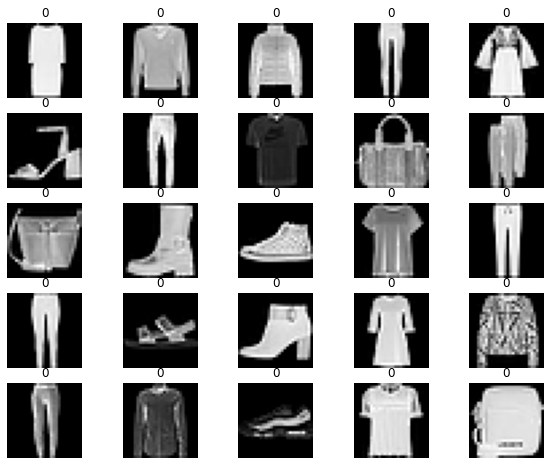

In [72]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(dataset_0), size=(1,)).item()
    img, label = dataset_0[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [73]:
dataset_90_train = [(img, 1) for img, _ in mnist_90_dataset_train]
dataset_90_test = [(img, 1) for img, _ in mnist_90_dataset_test]

dataset_90 = dataset_90_train + dataset_90_test
print(len(dataset_90))

70000


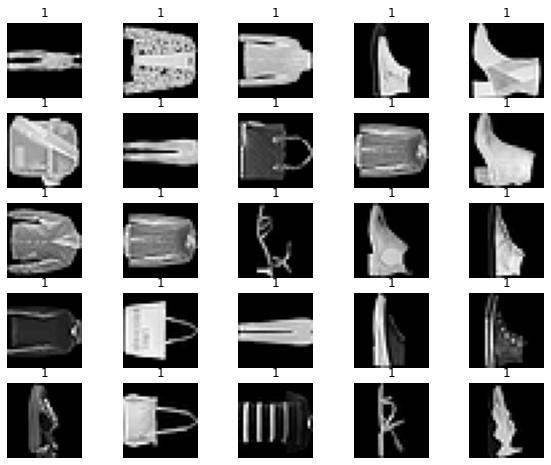

In [74]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(dataset_90), size=(1,)).item()
    img, label = dataset_90[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [75]:
dataset_180_train = [(img, 2) for img, _ in mnist_180_dataset_train]
dataset_180_test = [(img, 2) for img, _ in mnist_180_dataset_test]

dataset_180 = dataset_180_train + dataset_180_test
print(len(dataset_180))

70000


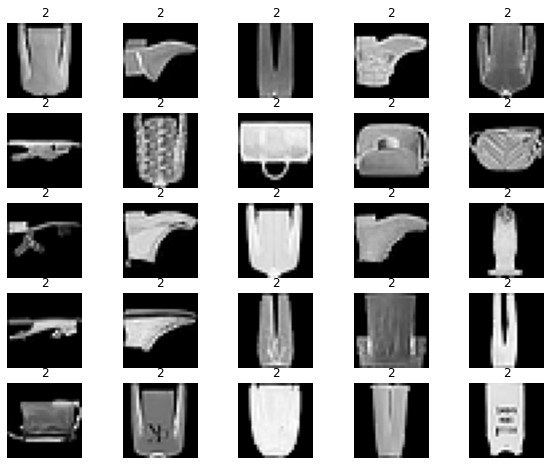

In [76]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(dataset_180), size=(1,)).item()
    img, label = dataset_180[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [77]:
dataset_270_train = [(img, 3) for img, _ in mnist_270_dataset_train]
dataset_270_test = [(img, 3) for img, _ in mnist_270_dataset_test]

dataset_270 = dataset_270_train + dataset_270_test
print(len(dataset_270))

70000


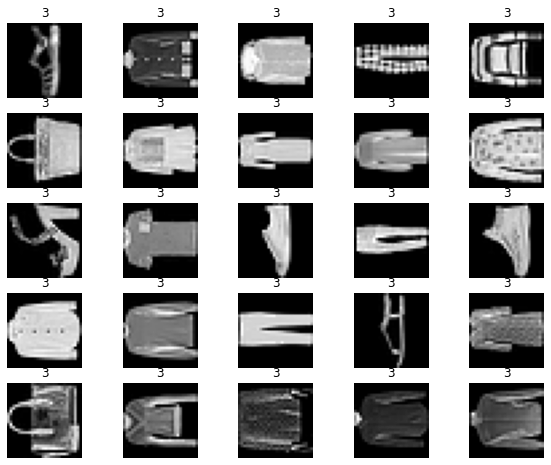

In [78]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(dataset_270), size=(1,)).item()
    img, label = dataset_270[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Merge and create datasets

In [79]:
dataset = dataset_0 + dataset_90 + dataset_180 + dataset_270
len(dataset)

280000

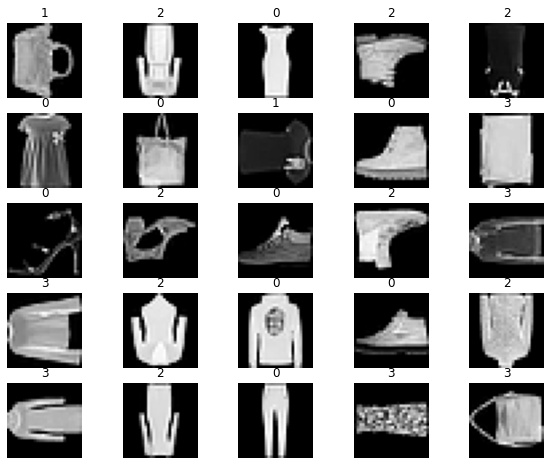

In [80]:
random.shuffle(dataset)

figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(dataset), size=(1,)).item()
    img, label = dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [81]:
dataset_train = dataset[:200000]
dataset_test = dataset[200000:]

### Model Building and Testing

In [82]:
loaders = {
    'train' : DataLoader(dataset_train, batch_size = 200, shuffle= True, num_workers=1),
    'test'  : DataLoader(dataset_test, batch_size = 200, shuffle= True, num_workers=1)
}
loaders

{'test': <torch.utils.data.dataloader.DataLoader at 0x7f4b24f0b210>,
 'train': <torch.utils.data.dataloader.DataLoader at 0x7f4b24f0bf90>}

In [83]:
# Creating the CNN class for Rotating classification

class CNN_ROT(nn.Module):
    def __init__(self):
        super(CNN_ROT, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(1,16,5,1,2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2),
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(16,32,5,1,2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2),
        )

        self.out = nn.Linear(32*7*7, 4)

    def forward(self,x):
        x = self.conv1(x)
        x = self.conv2(x)

        x = x.view(x.size(0), -1)
        output = self.out(x)

        return output, x

In [84]:
cnn_rotation = CNN_ROT()
print(cnn_rotation)

CNN_ROT(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=4, bias=True)
)


In [85]:
loss_func = nn.CrossEntropyLoss()
loss_func

CrossEntropyLoss()

In [86]:
optimizer = optim.Adam(cnn_rotation.parameters(), lr = 0.01)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    weight_decay: 0
)

In [87]:
# Training

from torch.autograd import Variable

num_epochs = 10

loss_vs_epoch = []

def train(num_epochs, cnn, loaders):
    cnn.train()

    total_steps = len(loaders['train'])

    for epoch in range(num_epochs):
        temp_loss = 0
        for i, (images, labels) in enumerate(loaders['train']):
            batch_x = Variable(images)
            batch_y = Variable(labels)

            output = cnn(batch_x)[0]
            loss = loss_func(output, batch_y)
            temp_loss += loss

            optimizer.zero_grad()

            loss.backward()

            optimizer.step()
            if (i+1)%100 == 0:
                print('Epoch [{}/{}], Step[{},{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_steps, loss.item() ))

        loss_vs_epoch.append(temp_loss/1000)

train(num_epochs, cnn_rotation, loaders)

Epoch [1/10], Step[100,1000], Loss: 0.2312
Epoch [1/10], Step[200,1000], Loss: 0.1989
Epoch [1/10], Step[300,1000], Loss: 0.1364
Epoch [1/10], Step[400,1000], Loss: 0.0836
Epoch [1/10], Step[500,1000], Loss: 0.0988
Epoch [1/10], Step[600,1000], Loss: 0.1766
Epoch [1/10], Step[700,1000], Loss: 0.0959
Epoch [1/10], Step[800,1000], Loss: 0.0830
Epoch [1/10], Step[900,1000], Loss: 0.0913
Epoch [1/10], Step[1000,1000], Loss: 0.1172
Epoch [2/10], Step[100,1000], Loss: 0.0732
Epoch [2/10], Step[200,1000], Loss: 0.0716
Epoch [2/10], Step[300,1000], Loss: 0.1048
Epoch [2/10], Step[400,1000], Loss: 0.1241
Epoch [2/10], Step[500,1000], Loss: 0.0482
Epoch [2/10], Step[600,1000], Loss: 0.0890
Epoch [2/10], Step[700,1000], Loss: 0.0699
Epoch [2/10], Step[800,1000], Loss: 0.0988
Epoch [2/10], Step[900,1000], Loss: 0.0682
Epoch [2/10], Step[1000,1000], Loss: 0.0445
Epoch [3/10], Step[100,1000], Loss: 0.0492
Epoch [3/10], Step[200,1000], Loss: 0.0356
Epoch [3/10], Step[300,1000], Loss: 0.0423
Epoch [3/

In [88]:
# tarining accuracy
def training_accuracy(test_data):
    cnn_rotation.eval()

    with torch.no_grad():
        correct = 0
        total = 0
        
        for images, labels in test_data:
            test_output, last_layer = cnn_rotation(images)
            pred_y = torch.max(test_output,1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item()/float(labels.size(0))
        print(f'Training Accuracy of the model on the {len(test_data)*200} test images: %.2f' % accuracy)

training_accuracy(loaders['train'])

Training Accuracy of the model on the 200000 test images: 0.99


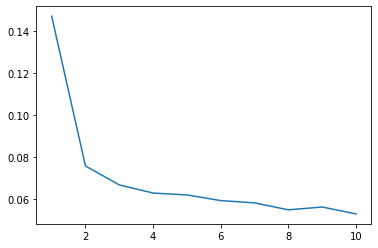

In [89]:
x = np.array([i for i in range(1, num_epochs+1)])
y = loss_vs_epoch

plt.plot(x, y)

In [90]:
# Print model's state_dict
model = cnn_rotation

print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
   print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
conv1.0.weight 	 torch.Size([16, 1, 5, 5])
conv1.0.bias 	 torch.Size([16])
conv2.0.weight 	 torch.Size([32, 16, 5, 5])
conv2.0.bias 	 torch.Size([32])
out.weight 	 torch.Size([4, 1568])
out.bias 	 torch.Size([4])
Optimizer's state_dict:
state 	 {0: {'step': 10000, 'exp_avg': tensor([[[[ 5.5417e-03,  8.9757e-03,  4.9312e-03,  4.8235e-03,  6.4203e-03],
          [ 8.3381e-03,  1.0911e-02,  8.9391e-03,  7.6823e-03,  7.3673e-03],
          [ 6.2501e-03,  7.6694e-03,  8.4931e-03,  6.5386e-03,  4.9995e-03],
          [-1.3158e-03,  3.7758e-04, -8.4925e-05,  1.4963e-03,  1.8150e-03],
          [-2.9460e-03, -2.8981e-04,  1.3511e-03,  2.4521e-03,  2.2197e-03]]],


        [[[-8.0106e-04,  1.0259e-03,  3.0819e-03, -4.7465e-06, -9.5062e-04],
          [ 2.3779e-03,  1.6881e-03,  1.4053e-03, -3.1430e-04, -1.6732e-03],
          [-1.3941e-05, -4.9709e-04,  5.3998e-04,  1.1157e-03,  2.6295e-03],
          [-4.3341e-03, -1.5508e-03,  2.9471e-03,  3.4143e-03,  3.8537e-03],
       

In [102]:
# save trained model

torch.save(cnn_rotation.state_dict(), "./CNN_ROT.model")

In [ ]:
# load trained model

cnn_rotation = CNN_ROT()
cnn_rotation.load_state_dict(torch.load("./CNN_ROT.model"))

<All keys matched successfully>

In [91]:
# test model

def test(test_data):
    cnn_rotation.eval()

    with torch.no_grad():
        correct = 0
        total = 0
        
        for images, labels in test_data:
            test_output, last_layer = cnn_rotation(images)
            pred_y = torch.max(test_output,1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item()/float(labels.size(0))
        print(f'Test Accuracy of the model on the {len(test_data)*200} test images: %.2f' % accuracy)

test(loaders['test'])

Test Accuracy of the model on the 80000 test images: 1.00


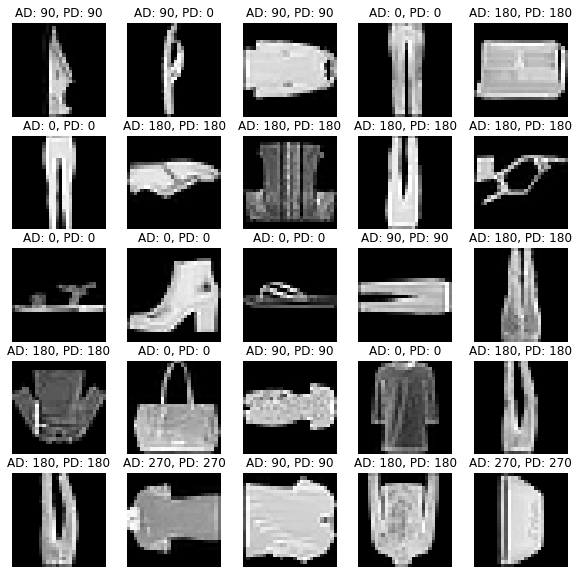

In [92]:
# map class labels to rotation degree
class2deg = {
    0: 0,
    1: 90,
    2: 180,
    3: 270
}

sample = next(iter(loaders['test']))
imgs, lbls = sample
imgs = imgs[:25]
lbls = lbls[:25].numpy()
test_output, last_layer = cnn_rotation(imgs)
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()

figure = plt.figure(figsize=(10, 10))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    img = imgs[i-1]
    label = lbls[i-1]
    pred = pred_y[i-1]
    figure.add_subplot(rows, cols, i)
    plt.title(f"AD: {class2deg[label]}, PD: {class2deg[pred]}")
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Final Model

### Create test dataset

In [93]:
# dataset_0_train = [(img, 0) for img, _ in mnist_dataset_train]
# dataset_0_test = [(img, 0) for img, _ in mnist_dataset_test]

final_dataset = list(mnist_dataset_train) + list(mnist_dataset_test) + list(mnist_90_dataset_train) + \
        list(mnist_90_dataset_test) + list(mnist_180_dataset_train) + list(mnist_180_dataset_test) + \
        list(mnist_270_dataset_train) + list(mnist_270_dataset_test)

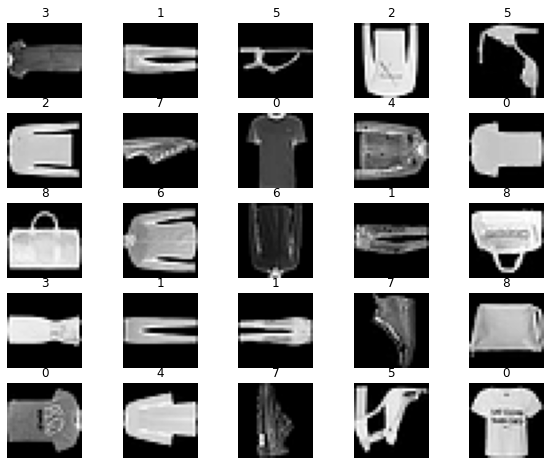

In [94]:
random.shuffle(final_dataset)

figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(final_dataset), size=(1,)).item()
    img, label = final_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Anti rotation function

In [95]:
def antirotate(img):
    output, _ = cnn_rotation(img.reshape(1, 1, img.shape[1], img.shape[2]))
    rot_angle = int(torch.max(output, 1)[1].data.squeeze())
    
    if rot_angle == 0:
        return img
    
    if rot_angle == 1:
        return transforms.functional.rotate(img, 90)

    if rot_angle == 2:
        return transforms.functional.rotate(img, 180)
    
    if rot_angle == 3:
        return transforms.functional.rotate(img, 270)

### Prediction function

In [100]:
def predict(images):
    # rotation
    for i in range(len(images)):
        images[i] = antirotate(images[i])

    # predict
    output = cnn_mnist(images)
    y_pred = torch.max(output, 1)[1].data.squeeze()
    return y_pred

### Testing

In [97]:
test_dataset = final_dataset[:80000]

In [98]:
test_dataset = DataLoader(test_dataset, batch_size = 200, shuffle= True, num_workers=1)

In [101]:
# test model

def test(test_data):
    cnn_rotation.eval()

    with torch.no_grad():
        total = 0
        
        for images, labels in test_data:
            pred_y = predict(images)
            accuracy = (pred_y == labels).sum().item()/float(labels.size(0))
            total += 200
            if total % 1000 == 0:
                print("processed:", total)

        print(f'Test Accuracy of the model on the {len(test_data)*200} test images: %.2f' % accuracy)

test(test_dataset)

processed: 1000
processed: 2000
processed: 3000
processed: 4000
processed: 5000
processed: 6000
processed: 7000
processed: 8000
processed: 9000
processed: 10000
processed: 11000
processed: 12000
processed: 13000
processed: 14000
processed: 15000
processed: 16000
processed: 17000
processed: 18000
processed: 19000
processed: 20000
processed: 21000
processed: 22000
processed: 23000
processed: 24000
processed: 25000
processed: 26000
processed: 27000
processed: 28000
processed: 29000
processed: 30000
processed: 31000
processed: 32000
processed: 33000
processed: 34000
processed: 35000
processed: 36000
processed: 37000
processed: 38000
processed: 39000
processed: 40000
processed: 41000
processed: 42000
processed: 43000
processed: 44000
processed: 45000
processed: 46000
processed: 47000
processed: 48000
processed: 49000
processed: 50000
processed: 51000
processed: 52000
processed: 53000
processed: 54000
processed: 55000
processed: 56000
processed: 57000
processed: 58000
processed: 59000
proces